In [48]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

## Preparing the Data

In [2]:
file_path = Path("Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [4]:
# Split the dataframe into data and target
y = df["MYOPIC"].values
X = df.drop("MYOPIC", axis=1)

In [24]:
# Standarize data with StandarScaler
myopia_scaled = StandardScaler().fit_transform(df)
#print(myopia_scaled[0:15])

## Applying Dimensionality Reduction

In [28]:
# Applying PCA to reduce dimensions from 4 to 2

# Initialize PCA model
pca = PCA(n_components=0.9)

# Get two principal components for the iris data.
myopia_pca = pca.fit_transform(myopia_scaled)

In [29]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.19869153, 0.14662762, 0.09951898, 0.07902771, 0.0710028 ,
       0.06555091, 0.06171931, 0.05989506, 0.05316865, 0.04913464,
       0.04465087])

In [33]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=35)

In [34]:
# Reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

/Users/ola/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [35]:
# The dataset has 2 columns
tsne_features.shape

(618, 2)

In [42]:
# Prepare to plot the dataset

# The first column of transformed features
df['x'] = tsne_features[:,0]

# The second column of transformed features
df['y'] = tsne_features[:,1]

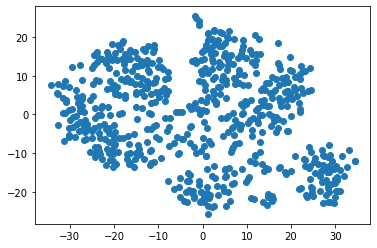

In [43]:
# Visualize the clusters
plt.scatter(df['x'], df['y'])
plt.show()

### There are no distinct clusters!

## Performing a Cluster Analysis with K-means

In [49]:
inertia = []

inertia = []
k = list(range(1, 10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()



,k,inertia
0,1,510665.254453
1,2,350699.221125
2,3,254775.628809
3,4,211168.944216
4,5,186288.801401


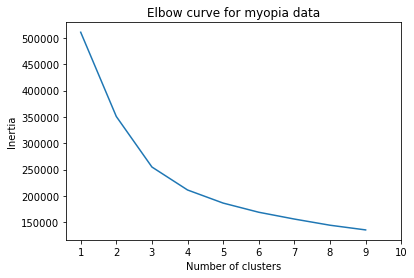

In [51]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for myopia data')
plt.show()